In [1]:
%matplotlib inline


# Text in Matplotlib Plots


Introduction to plotting and working with text in Matplotlib.

Matplotlib has extensive text support, including support for
mathematical expressions, truetype support for raster and
vector outputs, newline separated text with arbitrary
rotations, and unicode support.

Because it embeds fonts directly in output documents, e.g., for postscript
or PDF, what you see on the screen is what you get in the hardcopy.
`FreeType <https://www.freetype.org/>`_ support
produces very nice, antialiased fonts, that look good even at small
raster sizes.  Matplotlib includes its own
:mod:`matplotlib.font_manager` (thanks to Paul Barrett), which
implements a cross platform, `W3C <http://www.w3.org/>`
compliant font finding algorithm.

The user has a great deal of control over text properties (font size, font
weight, text location and color, etc.) with sensible defaults set in
the :doc:`rc file </tutorials/introductory/customizing>`.
And significantly, for those interested in mathematical
or scientific figures, Matplotlib implements a large number of TeX
math symbols and commands, supporting :doc:`mathematical expressions
</tutorials/text/mathtext>` anywhere in your figure.


Basic text commands
===================

The following commands are used to create text in the pyplot
interface and the object-oriented API:

=================== =================== ======================================
`.pyplot` API       OO API              description
=================== =================== ======================================
`~.pyplot.text`     `~.Axes.text`       Add text at an arbitrary location of
                                        the `~matplotlib.axes.Axes`.

`~.pyplot.annotate` `~.Axes.annotate`   Add an annotation, with an optional
                                        arrow, at an arbitrary location of the
                                        `~matplotlib.axes.Axes`.

`~.pyplot.xlabel`   `~.Axes.set_xlabel` Add a label to the
                                        `~matplotlib.axes.Axes`\'s x-axis.

`~.pyplot.ylabel`   `~.Axes.set_ylabel` Add a label to the
                                        `~matplotlib.axes.Axes`\'s y-axis.

`~.pyplot.title`    `~.Axes.set_title`  Add a title to the
                                        `~matplotlib.axes.Axes`.

`~.pyplot.figtext`  `~.Figure.text`     Add text at an arbitrary location of
                                        the `.Figure`.

`~.pyplot.suptitle` `~.Figure.suptitle` Add a title to the `.Figure`.
=================== =================== ======================================

All of these functions create and return a `.Text` instance, which can be
configured with a variety of font and other properties.  The example below
shows all of these commands in action, and more detail is provided in the
sections that follow.



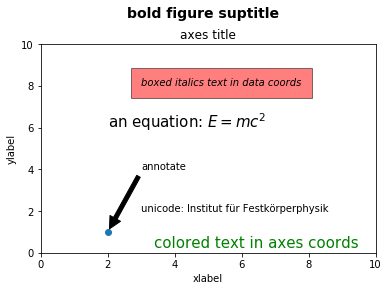

In [2]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

Labels for x- and y-axis
========================

Specifying the labels for the x- and y-axis is straightforward, via the
`~matplotlib.axes.Axes.set_xlabel` and `~matplotlib.axes.Axes.set_ylabel`
methods.



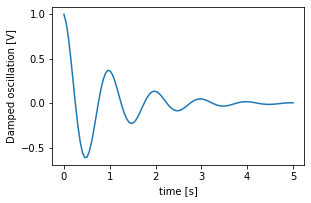

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('time [s]')
ax.set_ylabel('Damped oscillation [V]')

plt.show()

The x- and y-labels are automatically placed so that they clear the x- and
y-ticklabels.  Compare the plot below with that above, and note the y-label
is to the left of the one above.



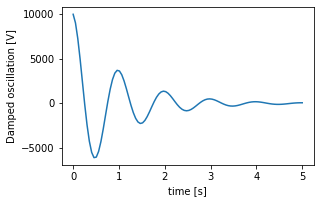

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1*10000)
ax.set_xlabel('time [s]')
ax.set_ylabel('Damped oscillation [V]')

plt.show()

If you want to move the labels, you can specify the *labelpad* keyword
argument, where the value is points (1/72", the same unit used to specify
fontsizes).



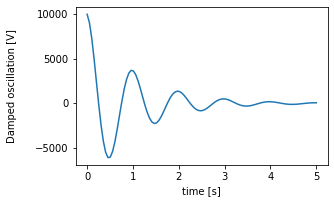

In [5]:
fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1*10000)
ax.set_xlabel('time [s]')
ax.set_ylabel('Damped oscillation [V]', labelpad=18)

plt.show()

Or, the labels accept all the `.Text` keyword arguments, including
*position*, via which we can manually specify the label positions.  Here we
put the xlabel to the far left of the axis.  Note, that the y-coordinate of
this position has no effect - to adjust the y-position we need to use the
*labelpad* kwarg.



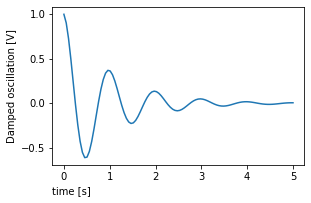

In [6]:
fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('time [s]', position=(0., 1e6),
                      horizontalalignment='left')
ax.set_ylabel('Damped oscillation [V]')

plt.show()

All the labelling in this tutorial can be changed by manipulating the
`matplotlib.font_manager.FontProperties` method, or by named kwargs to
`~matplotlib.axes.Axes.set_xlabel`



findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


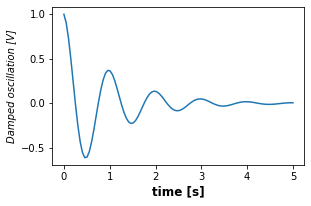

In [7]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('time [s]', fontsize='large', fontweight='bold')
ax.set_ylabel('Damped oscillation [V]', fontproperties=font)

plt.show()

Finally, we can use native TeX rendering in all text objects and have
multiple lines:



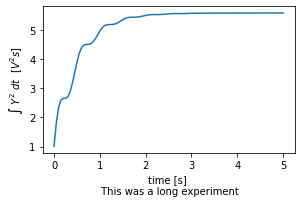

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.2, left=0.2)
ax.plot(x1, np.cumsum(y1**2))
ax.set_xlabel('time [s] \n This was a long experiment')
ax.set_ylabel(r'$\int\ Y^2\ dt\ \ [V^2 s]$')
plt.show()

Titles
======

Subplot titles are set in much the same way as labels, but there is
the *loc* keyword arguments that can change the position and justification
from the default value of ``loc=center``.



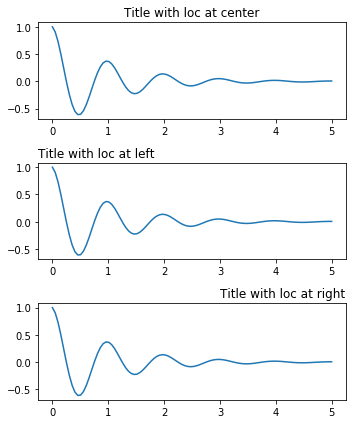

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(5, 6), tight_layout=True)
locs = ['center', 'left', 'right']
for ax, loc in zip(axs, locs):
    ax.plot(x1, y1)
    ax.set_title('Title with loc at '+loc, loc=loc)
plt.show()

Vertical spacing for titles is controlled via :rc:`axes.titlepad`, which
defaults to 5 points.  Setting to a different value moves the title.



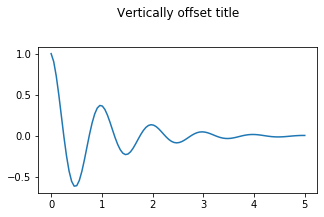

In [10]:
fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(top=0.8)
ax.plot(x1, y1)
ax.set_title('Vertically offset title', pad=30)
plt.show()

Ticks and ticklabels
====================

Placing ticks and ticklabels is a very tricky aspect of making a figure.
Matplotlib does the best it can automatically, but it also offers a very
flexible framework for determining the choices for tick locations, and
how they are labelled.

Terminology
~~~~~~~~~~~

*Axes* have an `matplotlib.axis` object for the ``ax.xaxis``
and ``ax.yaxis`` that
contain the information about how the labels in the axis are laid out.

The axis API is explained in detail in the documentation to
`~matplotlib.axis`.

An Axis object has major and minor ticks.  The Axis has a
`matplotlib.xaxis.set_major_locator` and
`matplotlib.xaxis.set_minor_locator` methods that use the data being plotted
to determine
the location of major and minor ticks.  There are also
`matplotlib.xaxis.set_major_formatter` and
`matplotlib.xaxis.set_minor_formatters` methods that format the tick labels.

Simple ticks
~~~~~~~~~~~~

It often is convenient to simply define the
tick values, and sometimes the tick labels, overriding the default
locators and formatters.  This is discouraged because it breaks itneractive
navigation of the plot.  It also can reset the axis limits: note that
the second plot has the ticks we asked for, including ones that are
well outside the automatic view limits.



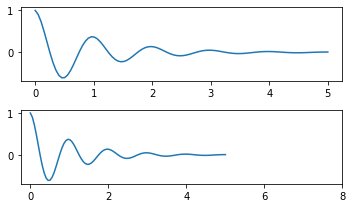

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 8.1, 2.))
plt.show()

We can of course fix this after the fact, but it does highlight a
weakness of hard-coding the ticks.  This example also changes the format
of the ticks:



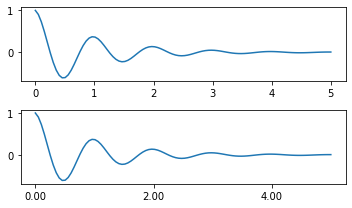

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
# list comprehension to get all tick labels...
tickla = ['%1.2f' % tick for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tickla)
axs[1].set_xlim(axs[0].get_xlim())
plt.show()

Tick Locators and Formatters
~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Instead of making a list of all the tickalbels, we could have
used a `matplotlib.ticker.FormatStrFormatter` and passed it to the
``ax.xaxis``



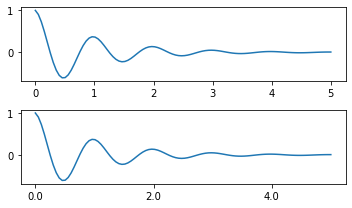

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
# list comprehension to get all tick labels...
formatter = matplotlib.ticker.StrMethodFormatter('{x:1.1f}')
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_major_formatter(formatter)
axs[1].set_xlim(axs[0].get_xlim())
plt.show()

And of course we could have used a non-default locator to set the
tick locations.  Note we still pass in the tick values, but the
x-limit fix used above is *not* needed.



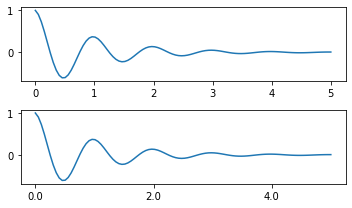

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
locator = matplotlib.ticker.FixedLocator(ticks)
axs[1].xaxis.set_major_locator(locator)
axs[1].xaxis.set_major_formatter(formatter)
plt.show()

The default formatter is the `matplotlib.ticker.MaxNLocator` called as
``ticker.MaxNLocator(self, nbins='auto', steps=[1, 2, 2.5, 5, 10])``
The *steps* keyword contains a list of multiples that can be used for
tick values.  i.e. in this case, 2, 4, 6 would be acceptable ticks,
as would 20, 40, 60 or 0.2, 0.4, 0.6. However, 3, 6, 9 would not be
acceptable because 3 doesn't appear in the list of steps.

``nbins=auto`` uses an algorithm to determine how many ticks will
be acceptable based on how long the axis is.  The fontsize of the
ticklabel is taken into account, but the length of the tick string
is not (because its not yet known.)  In the bottom row, the
ticklabels are quite large, so we set ``nbins=4`` to make the
labels fit in the right-hand plot.



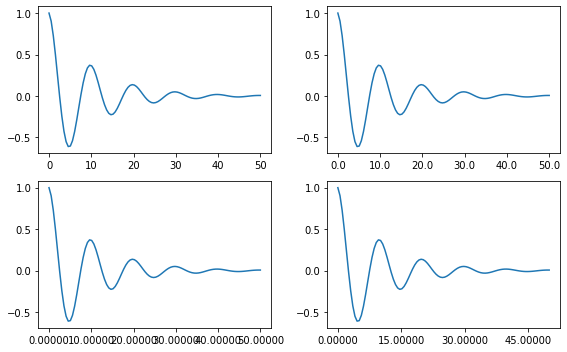

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
locator = matplotlib.ticker.MaxNLocator(nbins='auto', steps=[1, 4, 10])
axs[0, 1].xaxis.set_major_locator(locator)
axs[0, 1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
locator = matplotlib.ticker.AutoLocator()
axs[1, 0].xaxis.set_major_formatter(formatter)
axs[1, 0].xaxis.set_major_locator(locator)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
locator = matplotlib.ticker.MaxNLocator(nbins=4)
axs[1, 1].xaxis.set_major_formatter(formatter)
axs[1, 1].xaxis.set_major_locator(locator)

plt.show()

Finally, we can specify functions for the formatter using
`matplotlib.ticker.FuncFormatter`.



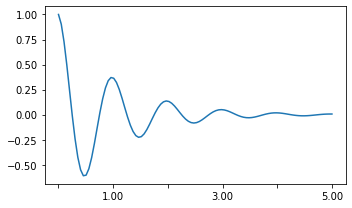

In [16]:
def formatoddticks(x, pos):
    """Format odd tick positions
    """
    if x % 2:
        return '%1.2f' % x
    else:
        return ''

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
formatter = matplotlib.ticker.FuncFormatter(formatoddticks)
locator = matplotlib.ticker.MaxNLocator(nbins=6)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

plt.show()

Dateticks
~~~~~~~~~

Matplotlib can accept `datetime.datetime` and `numpy.datetime64`
objects as plotting arguments.  Dates and times require special
formatting, which can often benefit from manual intervention. In
order to help, dates have special Locators and Formatters,
defined in the `matplotlib.dates` module.

A simple example is as follows.  Note how we have to rotate the
tick labels so that they don't over-run each other.



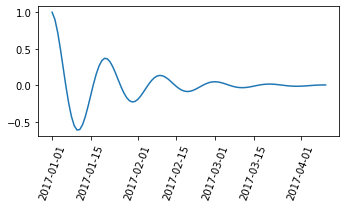

In [17]:
import datetime

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(y1))]

ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)
plt.show()

We can pass a format
to `matplotlib.dates.DateFormatter`.  Also note that the 29th and the
next month are very close together.  We can fix this by using the
`dates.DayLocator` class, which allows us to specify a list of days of the
month to use. Similar formatters are listed in the `matplotlib.dates` module.



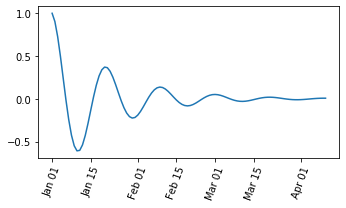

In [18]:
import matplotlib.dates as mdates

locator = mdates.DayLocator(bymonthday=[1, 15])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)
plt.show()

Legends and Annotations
=======================

- Legends: :doc:`/tutorials/intermediate/legend_guide`
- Annotations: :doc:`/tutorials/text/annotations`


